<div>
    <h1>Eskwelabs Manila Cohort I</h1>
    <h2 align = 'left'> Hackathon 2 </h2>
    <h3>Team 4</h3>
    <ul>
        <li>Francis Roxas</li>
        <li>Neil Negrite</li>
    </ul>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_applications = pd.read_csv('applications.csv')
df_applications = df_applications.iloc[:,1:]
df_na = df_applications[df_applications.GENDER.isna()].iloc[:,0].values.tolist()

In [3]:
with open('last.csv',mode='w') as f:

    for r in df_na:

        f.write(r)

        f.write('\n')

In [4]:
df_na_final = pd.read_csv('last.csv')
df_not_na = df_applications[~df_applications.GENDER.isna()]
df_na_final.columns = df_applications.columns
final_df = pd.concat([df_na_final,df_not_na])

In [5]:
#mean default rate of population
print('Mean default rate of population: ' + str(round(final_df.LOAN_DEFAULT.mean(),4)))

Mean default rate of population: 0.0801


In [6]:
#creation of graphs
app_full = final_df.copy()

app_trim = app_full[['LOAN_ID','LOAN_DEFAULT','GENDER','NAME_FAMILY_STATUS','WEEKDAY_APPR_PROCESS_START']]

genders = {'F':'Female','M':'Male'}
app_trim['GENDER'] = app_trim.GENDER.apply(lambda x: genders[x])
app_trim.head()

C:\Users\negritejr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,LOAN_ID,LOAN_DEFAULT,GENDER,NAME_FAMILY_STATUS,WEEKDAY_APPR_PROCESS_START
0,100008,0.0,Male,Married,WEDNESDAY
1,100022,0.0,Female,Widow,FRIDAY
2,100024,0.0,Male,Married,FRIDAY
3,100030,0.0,Female,Married,SATURDAY
4,100040,0.0,Female,Married,FRIDAY


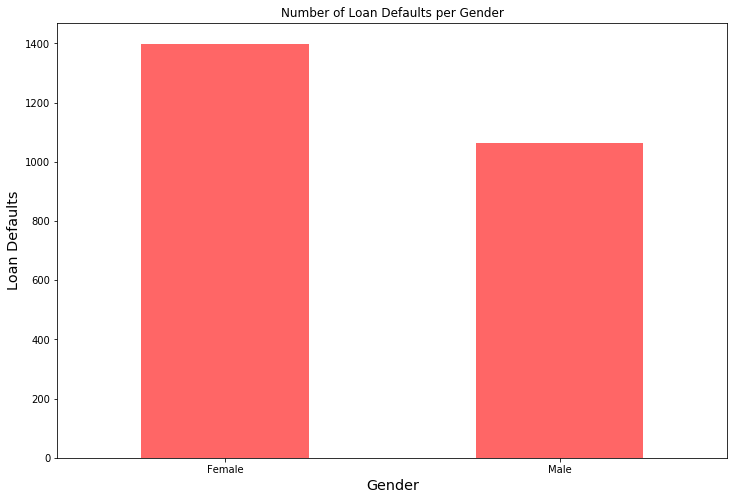

In [7]:
#gender plots
fig = app_trim.groupby('GENDER').agg('sum').plot.bar(color='red',figsize=(12,8),legend=False,alpha=.6)
plt.ylabel('Loan Defaults',size='x-large',family='sans-serif')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Gender',size='x-large',family='sans-serif')
plt.title('Number of Loan Defaults per Gender')
plt.show()

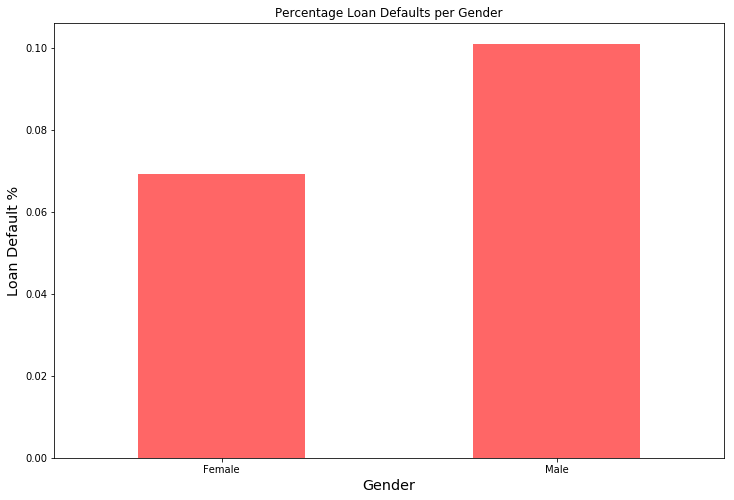

In [8]:
#gender plots
fig = app_trim.groupby('GENDER').agg('mean').plot.bar(color='red',figsize=(12,8),legend=False,alpha=.6)
plt.ylabel('Loan Default %',size='x-large',family='sans-serif')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Gender',size='x-large',family='sans-serif')
plt.title('Percentage Loan Defaults per Gender')
plt.show()

Text(0.5, 1.0, 'Count of Loan Defaults per Family Type')

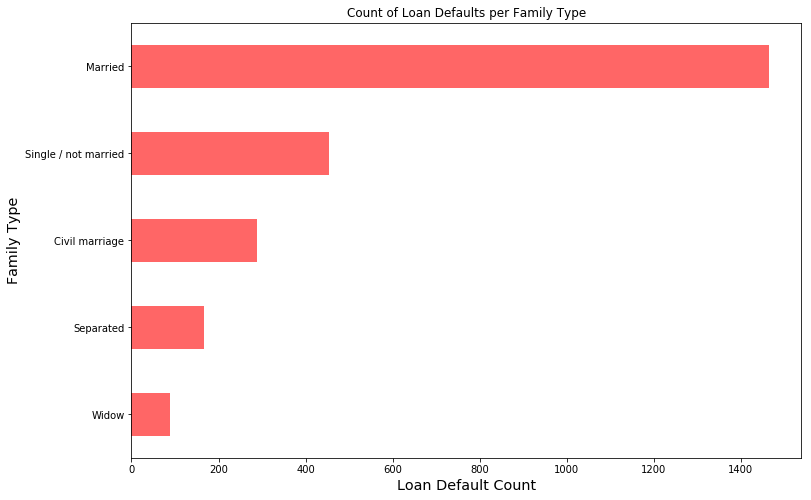

In [9]:
fig = app_trim.groupby('NAME_FAMILY_STATUS').agg('sum').sort_values(by = 'LOAN_DEFAULT')\
    .plot.barh(color='red',figsize=(12,8),legend=False,alpha=.6)
plt.ylabel('Family Type',size='x-large',family='sans-serif')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Loan Default Count',size='x-large',family='sans-serif')
plt.title('Count of Loan Defaults per Family Type')

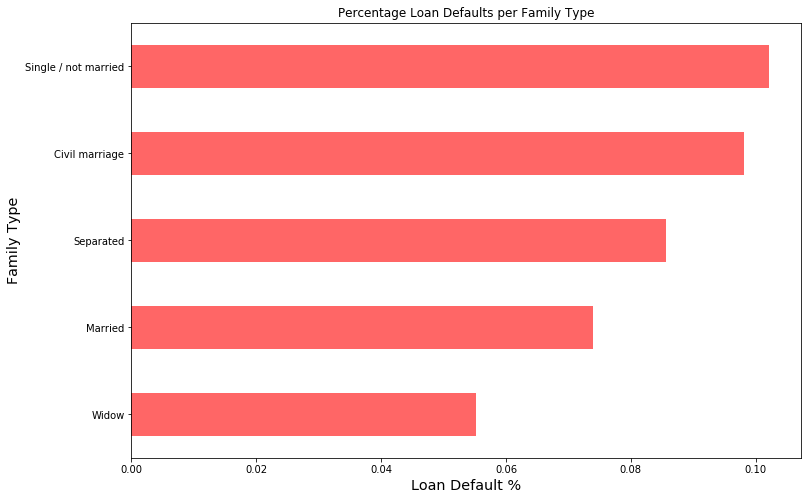

In [10]:
fig = app_trim.groupby('NAME_FAMILY_STATUS').agg('mean').sort_values(by = 'LOAN_DEFAULT')\
    .plot.barh(color='red',figsize=(12,8),legend=False,alpha=.6)
plt.ylabel('Family Type',size='x-large',family='sans-serif')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Loan Default %',size='x-large',family='sans-serif')
plt.title('Percentage Loan Defaults per Family Type')
plt.savefig('fam_percent.jpg')

Text(0.5, 0, 'Loan Default %')

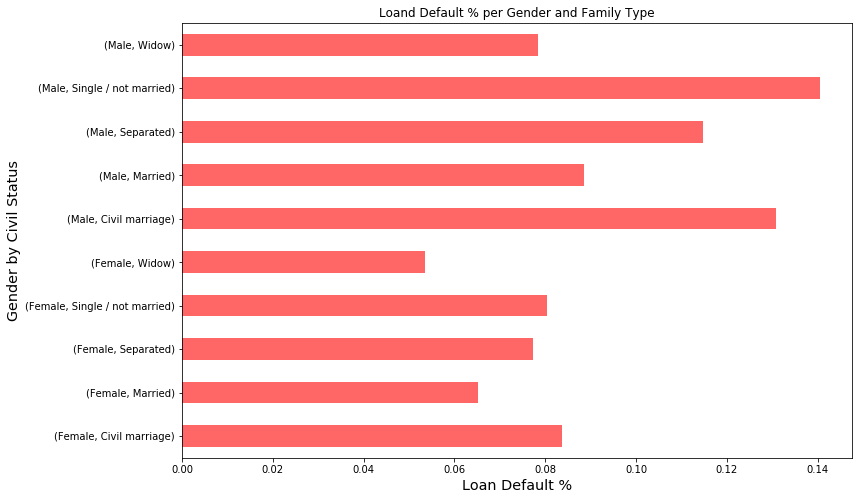

In [11]:
app_trim.groupby(['GENDER','NAME_FAMILY_STATUS']).LOAN_DEFAULT.mean().plot(
    kind='barh',
    color='red',figsize=(12,8),legend=False,alpha=.6)
plt.ylabel('Gender by Civil Status',size='x-large',family='sans-serif')
plt.xticks(rotation = 'horizontal')
plt.title('Loand Default % per Gender and Family Type')
plt.xlabel('Loan Default %',size='x-large',family='sans-serif')

In [12]:
weekdays = {'SUNDAY':1,'MONDAY':2,'TUESDAY':3,'WEDNESDAY':4,'THURSDAY':5,'FRIDAY':6,'SATURDAY':7}
app_dt = app_trim.groupby('WEEKDAY_APPR_PROCESS_START').agg('mean').reset_index()
app_dt['idt'] = app_dt.WEEKDAY_APPR_PROCESS_START.apply(lambda x: weekdays[x])
app_dt = app_dt.set_index('WEEKDAY_APPR_PROCESS_START').sort_values(by = 'idt', ascending = False)

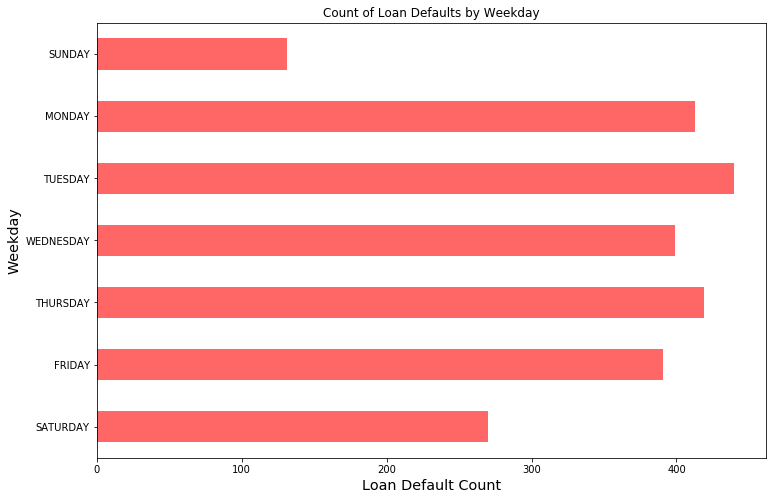

In [13]:
app_dt = app_trim.groupby('WEEKDAY_APPR_PROCESS_START').agg('sum').reset_index()
app_dt['idt'] = app_dt.WEEKDAY_APPR_PROCESS_START.apply(lambda x: weekdays[x])
app_dt = app_dt.set_index('WEEKDAY_APPR_PROCESS_START').sort_values(by = 'idt', ascending = False)
fig = app_dt['LOAN_DEFAULT'].plot.barh(color='red',figsize=(12,8),legend=False,alpha=.6)
plt.ylabel('Weekday',size='x-large',family='sans-serif')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Loan Default Count',size='x-large',family='sans-serif')
plt.title('Count of Loan Defaults by Weekday')
plt.savefig('day_percent.jpg')

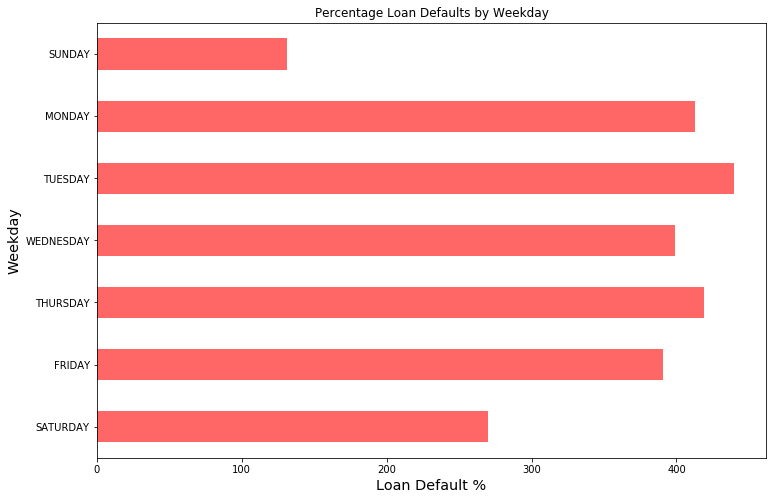

In [14]:
fig = app_dt['LOAN_DEFAULT'].plot.barh(color='red',figsize=(12,8),legend=False,alpha=.6)
plt.ylabel('Weekday',size='x-large',family='sans-serif')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Loan Default %',size='x-large',family='sans-serif')
plt.title('Percentage Loan Defaults by Weekday')
plt.savefig('day_percent.jpg')

In [15]:
import seaborn as sns
sns.set()

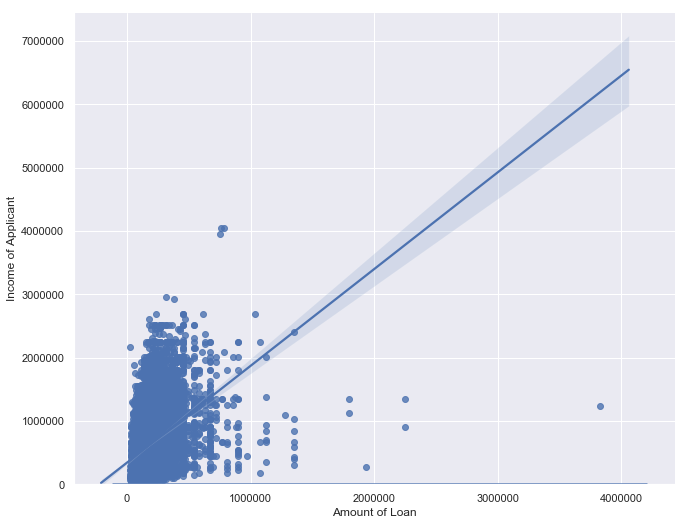

In [16]:
final_df = app_full[app_full.AMT_INCOME_TOTAL < 1e8]
sns.lmplot('AMT_INCOME_TOTAL','AMT_CREDIT',final_df)

ax = sns.distplot(final_df['AMT_CREDIT'])
ax.set(xlabel = 'Amount of Loan', ylabel = 'Income of Applicant', label = '')
b = plt.gcf()
b.set_figwidth(12)
b.set_figheight(8)

[Text(0, 0.5, 'PDF'), Text(0.5, 0, 'Amount of Loan'), None]

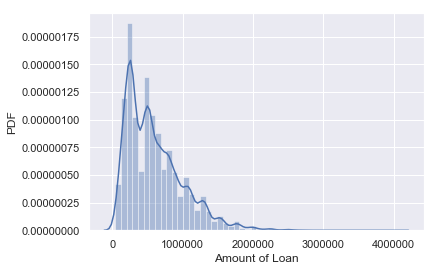

In [17]:
ax = sns.distplot(app_full['AMT_CREDIT'])
ax.set(xlabel = 'Amount of Loan', ylabel = 'PDF', label = '')